In [ ]:
pip install tensorflow scikit-learn


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Replace these with the actual paths to your training and test directories
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Flow from the correct directory
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Updated with actual path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure the order of data is preserved for evaluation
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Updated with actual path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure the order of data is preserved for evaluation
)

# You can now proceed with training your model or loading an existing one.


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [10]:
#A1
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define paths to training and testing data
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Define classes (subfolders in the directories)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to hold feature data (width, height) and labels
X_train = []
y_train = []
X_test = []
y_test = []

def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to a fixed size
    width, height = img.size
    return width, height

# Process training images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    for image_name in images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_train.append([width, height])  # Use width and height as features
        y_train.append(label)

# Process testing images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)
    images = os.listdir(class_dir)
    
    for image_name in images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_test.append([width, height])  # Use width and height as features
        y_test.append(label)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate on the training and testing sets
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')


Training accuracy: 0.28
Test accuracy: 0.31


In [11]:
#A2
import os
import numpy as np
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

# Define paths to training and testing data
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Define classes (subfolders in the directories)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to hold feature data (width, height) and labels
X_train = []
y_train = []
X_test = []
y_test = []

def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to a fixed size
    width, height = img.size
    return width, height

# Process training images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    for image_name in images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_train.append([width, height])  # Use width and height as features
        y_train.append(label)

# Process testing images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)
    images = os.listdir(class_dir)
    
    for image_name in images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_test.append([width, height])  # Use width and height as features
        y_test.append(label)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
reg = LinearRegression().fit(X_train_scaled, y_train)

# Predict on training and testing data
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


Training Metrics:
MSE: 1.2193
RMSE: 1.1042
MAPE: 1622841859140475.7500
R²: 0.0000

Testing Metrics:
MSE: 1.1643
RMSE: 1.0790
MAPE: 1605758188774262.7500
R²: -0.0004


In [31]:
#A3
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Set up paths
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Feature extraction using a pre-trained CNN
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=x)

# Prepare data generators for feature extraction
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(150, 150),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

# Extract features from the training and testing data
def extract_features(generator):
    features = []
    labels = []
    for _ in range(generator.samples // generator.batch_size):
        x_batch, y_batch = next(generator)
        features_batch = model.predict(x_batch)
        features.append(features_batch)
        labels.append(y_batch)
    return np.vstack(features), np.vstack(labels)

X_train, y_train = extract_features(train_generator)
X_test, y_test = extract_features(test_generator)

# Flatten the output of VGG16 for regression
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Train a linear regression model
reg = LinearRegression().fit(X_train_flattened, y_train)

# Predict on training and testing data
y_train_pred = reg.predict(X_train_flattened)
y_test_pred = reg.predict(X_test_flattened)

# Convert predictions to appropriate shape for comparison (if needed)
y_train = y_train.argmax(axis=1)  # Convert one-hot encoded labels to single class indices
y_test = y_test.argmax(axis=1)
y_train_pred = np.argmax(y_train_pred, axis=1)  # Get class indices from predictions
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━

In [2]:
#A4
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Set up paths
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'

# Load pre-trained VGG16 model without top layers and include GlobalAveragePooling2D
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
features = Dense(1024, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=features)

# Prepare data generator for feature extraction
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode=None,  # No labels needed for clustering
                                              shuffle=False)  # Ensure order is consistent

# Extract features using the pre-trained model
def extract_features(generator):
    features = []
    for _ in range(generator.samples // generator.batch_size):
        x_batch = next(generator)
        features_batch = model.predict(x_batch)
        features.append(features_batch)
    return np.vstack(features)

X_train_features = extract_features(train_generator)

# Flatten the output of the model for clustering
X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)

# Perform K-Means Clustering
n_clusters = 4  # Number of clusters (change as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(X_train_flattened)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Print results
print(f"Cluster Labels: {np.unique(cluster_labels)}")
print(f"Cluster Centers Shape: {cluster_centers.shape}")

# Optionally, you can plot the clusters if you reduce dimensionality using PCA or t-SNE for visualization


Found 5712 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━

In [8]:
#A5
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = r'C:\Users\manik\Downloads\ML DATASET HENRY.zip'

# Extract the zip file to access the data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

# Set up the directories for the extracted Training and Testing data
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'


# ImageDataGenerator to load images (without augmentation, only rescaling)
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training dataset (without the target labels)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode=None,  # We ignore labels
                                              shuffle=False)

# Load testing dataset (without the target labels)
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(150, 150),
                                             batch_size=32,
                                             class_mode=None,  # We ignore labels
                                             shuffle=False)

# Function to extract features and flatten images
def extract_and_flatten(generator):
    X_data = []
    for i in range(len(generator)):
        batch = generator[i]  # Get the images (ignore labels)
        X_data.append(batch)
    # Convert list of batches into a single array
    X_data = np.vstack(X_data)
    # Flatten each image into a 1D array
    X_data_flat = X_data.reshape(X_data.shape[0], -1)
    return X_data_flat

# Extract features for training and testing datasets
X_train_flat = extract_and_flatten(train_generator)
X_test_flat = extract_and_flatten(test_generator)

# Perform K-Means clustering for training data
kmeans_train = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train_flat)

# Perform K-Means clustering for testing data
kmeans_test = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_test_flat)

# Calculate metrics for training data
silhouette_train = silhouette_score(X_train_flat, kmeans_train.labels_)
ch_train = calinski_harabasz_score(X_train_flat, kmeans_train.labels_)
db_train = davies_bouldin_score(X_train_flat, kmeans_train.labels_)

# Calculate metrics for testing data
silhouette_test = silhouette_score(X_test_flat, kmeans_test.labels_)
ch_test = calinski_harabasz_score(X_test_flat, kmeans_test.labels_)
db_test = davies_bouldin_score(X_test_flat, kmeans_test.labels_)

# Print the results
print("Training Data Metrics:")
print(f"Silhouette Score: {silhouette_train:.4f}")
print(f"Calinski-Harabasz (CH) Score: {ch_train:.4f}")
print(f"Davies-Bouldin (DB) Index: {db_train:.4f}")

print("\nTesting Data Metrics:")
print(f"Silhouette Score: {silhouette_test:.4f}")
print(f"Calinski-Harabasz (CH) Score: {ch_test:.4f}")
print(f"Davies-Bouldin (DB) Index: {db_test:.4f}")


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Training Data Metrics:
Silhouette Score: 0.2990
Calinski-Harabasz (CH) Score: 795.1988
Davies-Bouldin (DB) Index: 2.2277

Testing Data Metrics:
Silhouette Score: 0.2792
Calinski-Harabasz (CH) Score: 222.4224
Davies-Bouldin (DB) Index: 2.1951


Found 5712 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━

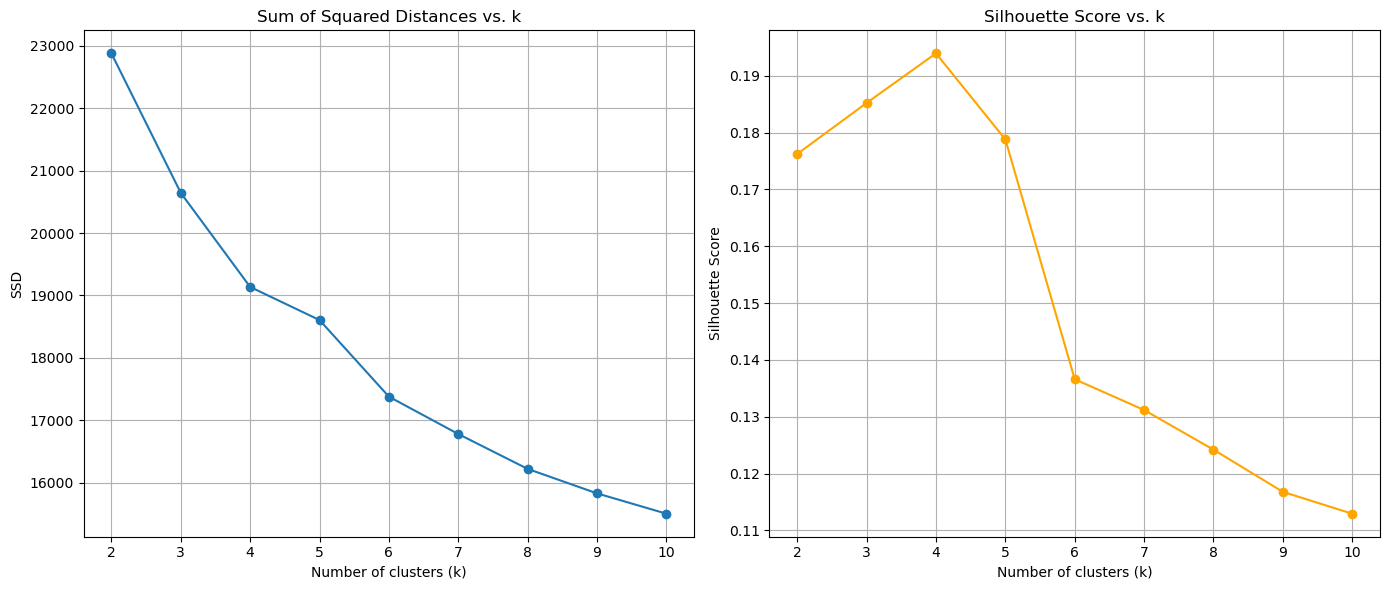

In [24]:
#A6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Set up paths
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'

# Load pre-trained VGG16 model without top layers and include GlobalAveragePooling2D
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
features = Dense(1024, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=features)

# Prepare data generator for feature extraction
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode=None,  # No labels needed for clustering
                                              shuffle=False)  # Ensure order is consistent

# Extract features using the pre-trained model
def extract_features(generator):
    features = []
    for _ in range(generator.samples // generator.batch_size):
        x_batch = next(generator)
        features_batch = model.predict(x_batch)
        features.append(features_batch)
    return np.vstack(features)

X_train_features = extract_features(train_generator)

# Flatten the output of the model for clustering
X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)

# Define range of k values to test
k_values = range(2, 11)  # Test k from 2 to 10
ssd = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_train_flattened)
    labels = kmeans.labels_
    
    # Sum of Squared Distances (SSD)
    ssd.append(kmeans.inertia_)
    
    # Silhouette Score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(X_train_flattened, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# Plot SSD vs. k
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, ssd, marker='o')
plt.title('Sum of Squared Distances vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSD')
plt.grid(True)

# Plot Silhouette Score vs. k
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


Found 5712 images belonging to 4 classes.
Extracting features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

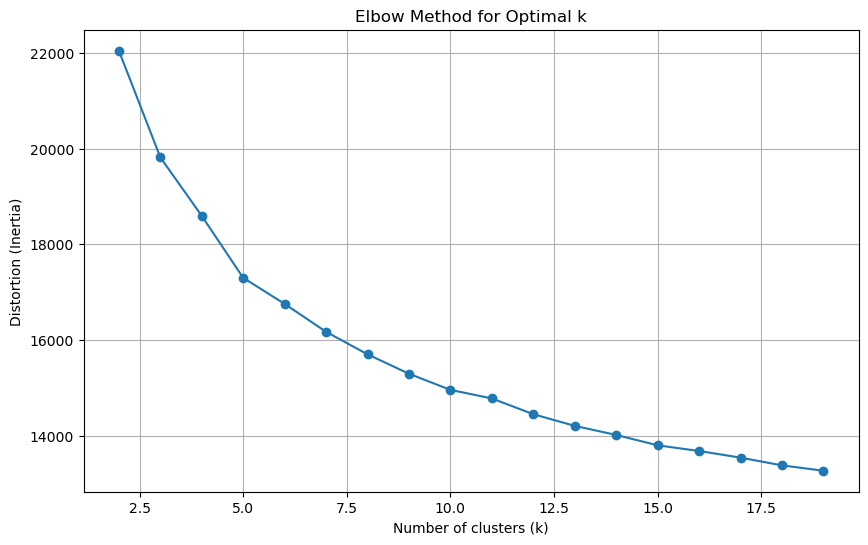

In [1]:
#A7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Set up paths
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'

# Load pre-trained VGG16 model without top layers and include GlobalAveragePooling2D
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
features = Dense(1024, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=features)

# Prepare data generator for feature extraction
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode=None,  # No labels needed for clustering
                                              shuffle=False)  # Ensure order is consistent

# Extract features using the pre-trained model
def extract_features(generator):
    features = []
    num_batches = generator.samples // generator.batch_size
    for _ in range(num_batches):
        x_batch = next(generator)
        features_batch = model.predict(x_batch)
        features.append(features_batch)
    return np.vstack(features)

# Extract features from the training set
print("Extracting features...")
X_train_features = extract_features(train_generator)
print(f"Extracted features shape: {X_train_features.shape}")

# Flatten the output of the model for clustering
X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)
print(f"Flattened features shape: {X_train_flattened.shape}")

# Define range of k values to test
k_range = range(2, 20)
distortions = []

print("Performing k-means clustering...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_train_flattened)
    distortions.append(kmeans.inertia_)
    print(f"k={k}, Inertia={kmeans.inertia_}")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()


In [1]:
#A1(Extra)
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set up paths (ensure these paths point to the extracted folders)
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# ImageDataGenerator for preprocessing images
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load train and test datasets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes (glioma, meningioma, notumor, pituitary)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.4384 - loss: 1.1745 - val_accuracy: 0.5904 - val_loss: 1.1094
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 759ms/step - accuracy: 0.6279 - loss: 0.8773 - val_accuracy: 0.6804 - val_loss: 0.8006
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 741ms/step - accuracy: 0.6874 - loss: 0.7779 - val_accuracy: 0.5866 - val_loss: 1.0491
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 758ms/step - accuracy: 0.7115 - loss: 0.7153 - val_accuracy: 0.6377 - val_loss: 0.9793
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 50627s 284s/step - accuracy: 0.7453 - loss: 0.6389 - val_accuracy: 0.6461 - val_loss: 0.9074
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 557ms/step - accuracy: 0.7754 - loss: 0.6034 - val_accuracy: 0.5843 - val_loss: 1.1973
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 377ms/step - accuracy: 0.7795 - loss: 0.5735 - val_accuracy: 0.7620 - val_loss: 0.6331
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 388ms/step - accuracy: 0.7691 - loss: 0.5890 -

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Update these paths with the actual paths to your directories
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Corrected variable name
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # Shuffle the data during training
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Corrected variable name
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Perform predictions on the train and test sets
y_train_pred = model.predict(train_generator)
y_test_pred = model.predict(test_generator)

# Extract true labels
y_train_true = train_generator.classes
y_test_true = test_generator.classes

# Convert predictions to class labels
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate classification metrics for the train set
train_accuracy = accuracy_score(y_train_true, y_train_pred_classes)
train_report = classification_report(y_train_true, y_train_pred_classes, output_dict=True)

# Calculate classification metrics for the test set
test_accuracy = accuracy_score(y_test_true, y_test_pred_classes)
test_report = classification_report(y_test_true, y_test_pred_classes, output_dict=True)

# Display the metrics
print("Train Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Classification Report:\n{train_report}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Classification Report:\n{test_report}")


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 461ms/step - accuracy: 0.5385 - loss: 1.0926 - val_accuracy: 0.8055 - val_loss: 0.5035
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 449ms/step - accuracy: 0.8304 - loss: 0.4710 - val_accuracy: 0.8352 - val_loss: 0.4756
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 455ms/step - accuracy: 0.8717 - loss: 0.3297 - val_accuracy: 0.8574 - val_loss: 0.3472
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 455ms/step - accuracy: 0.9021 - loss: 0.2656 - val_accuracy: 0.9031 - val_loss: 0.2624
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 449ms/step - accuracy: 0.9269 - loss: 0.2067 - val_accuracy: 0.9008 - val_loss: 0.2224
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 428ms/step - accuracy: 0.9293 - loss: 0.1838 - val_accuracy: 0.9375 - val_loss: 0.1682
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 428ms/step - accuracy: 0.9488 - loss: 0.1432 - val_accuracy: 0.9359 - val_loss: 0.1683
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 432ms/step - accuracy: 0.9577 - loss: 0.1153 - val